## Import Required Package

In [1]:
import FundamentalAnalysis as fa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
ticker = "AMZN"

## SP500 Companies Details

- get _SP500 Tickers_

In [4]:
def sp500_ticker(url):
    # function: scraping the S&P 500 companies list from Wikipedia
    
    tickers = []
    response = requests.get(url)
    
    if not response.status_code == 200:
        return None
    try:
        result_page = BeautifulSoup(response.content, 'lxml')
        table = result_page.find('table',{'class': 'wikitable sortable'})
        link = table.find_all('tr')[1:]
        for links in link:
            tickers.append(links.findAll('td')[0].text)
            
        tickers = list(map(lambda x:x.strip(), tickers))
        return tickers
    
    except:
        return None     

In [5]:
url = "http://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tickers = sp500_ticker(url)
tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'T',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA

- Show the available S&P 500 companies' names


In [6]:
companies = fa.available_companies()
company_ref=companies.loc[tickers, :]
company_ref

,name
MMM,3M Company
ABT,Abbott Laboratories
ABBV,AbbVie Inc.
ABMD,ABIOMED Inc.
ACN,Accenture plc Class A (Ireland)
...,...
YUM,Yum! Brands Inc.
ZBRA,Zebra Technologies Corporation
ZBH,Zimmer Biomet Holdings Inc.
ZION,Zions Bancorporation


## Amazon Company General Information

-  general Amazon company information

In [8]:
profile = fa.profile(ticker)
profile

,profile
price,1906.59
beta,1.516863
volAvg,5481036
mktCap,9.4911955E11
lastDiv,0
range,1626.03-2185.95
changes,-12.24
changesPercentage,(-0.64%)
companyName,Amazon.com Inc.
exchange,Nasdaq Global Select


- _market cap_ and _enterprise value_

In [10]:
entreprise_value = fa.enterprise(ticker)
entreprise_value

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
Stock Price,1781.6,1772.36,1162.35,743.65,679.06,326.0,392.3,250.33,197.13,176.55,138.5
Number of Shares,4.94E8,4.87E8,4.8E8,4.74E8,4.67E8,4.62E8,4.57E8,4.53E8,4.53E8,4.47E8,4.32982766E8
Market Capitalization,8.8011e+11,8.63139e+11,5.57928e+11,3.5249e+11,3.17121e+11,1.50612e+11,1.79281e+11,1.13399e+11,8.92999e+10,7.89178e+10,5.99681e+10
- Cash & Cash Equivalents,3.6092e+10,3.175e+10,2.0522e+10,1.9334e+10,1.589e+10,1.4557e+10,8.658e+09,8.084e+09,5.269e+09,3.777e+09,3.444e+09
+ Total Debt,2.4721e+10,2.4866e+10,2.4843e+10,8.75e+09,8.473e+09,9.785e+09,3.944e+09,3.663e+09,3.84e+08,-3.4e+07,0
Enterprise Value,8.68739e+11,8.56255e+11,5.62249e+11,3.41906e+11,3.09704e+11,1.4584e+11,1.74567e+11,1.08978e+11,8.44149e+10,7.51068e+10,5.65241e+10


- Recommendations of Analysts

In [11]:
ratings = fa.rating(ticker)
ratings

,score,recommendation
P/B,5,Strong Buy
ROA,4,Neutral
DCF,3,Neutral
P/E,5,Strong Buy
ROE,4,Buy
D/E,3,Buy


## Financial Statement

### Balance Sheet Statement

In [55]:
BSquarterly = fa.balance_sheet_statement(ticker, period="annual")
BSquarterly

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
Cash and cash equivalents,36092000000.0,31750000000.0,20522000000.0,19334000000.0,15890000000.0,14557000000.0,8658000000.0,8084000000.0,5269000000.0,3777000000.0,3444000000.0
Short-term investments,18929000000.0,9500000000.0,10464000000.0,6647000000.0,3918000000.0,2859000000.0,3789000000.0,3364000000.0,4307000000.0,4985000000.0,2922000000.0
Cash and short-term investments,55021000000.0,41250000000.0,30986000000.0,25981000000.0,19808000000.0,17416000000.0,12447000000.0,11448000000.0,9576000000.0,8762000000.0,6366000000.0
Receivables,20816000000.0,16677000000.0,13164000000.0,8339000000.0,6423000000.0,5612000000.0,4767000000.0,3364000000.0,2571000000.0,1587000000.0,988000000.0
Inventories,20497000000.0,17174000000.0,16047000000.0,11461000000.0,10243000000.0,8299000000.0,7411000000.0,6031000000.0,4992000000.0,3202000000.0,2171000000.0
Total current assets,96334000000.0,75101000000.0,60197000000.0,45781000000.0,36474000000.0,31327000000.0,24625000000.0,21296000000.0,17490000000.0,13747000000.0,9797000000.0
"Property, Plant & Equipment Net",72705000000.0,61797000000.0,48866000000.0,29114000000.0,21838000000.0,16967000000.0,10949000000.0,7060000000.0,4417000000.0,2414000000.0,1290000000.0
Goodwill and Intangible Assets,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1234000000.0
Long-term investments,1500000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax assets,11157000000.0,3784000000.0,2960000000.0,3074000000.0,2343000000.0,2106000000.0,1465000000.0,123000000.0,28000000.0,22000000.0,290000000.0


In [56]:
BSquarterly.index

Index(['Cash and cash equivalents', 'Short-term investments',
       'Cash and short-term investments', 'Receivables', 'Inventories',
       'Total current assets', 'Property, Plant & Equipment Net',
       'Goodwill and Intangible Assets', 'Long-term investments', 'Tax assets',
       'Total non-current assets', 'Total assets', 'Payables',
       'Short-term debt', 'Total current liabilities', 'Long-term debt',
       'Total debt', 'Deferred revenue', 'Tax Liabilities',
       'Deposit Liabilities', 'Total non-current liabilities',
       'Total liabilities', 'Other comprehensive income',
       'Retained earnings (deficit)', 'Total shareholders equity',
       'Investments', 'Net Debt', 'Other Assets', 'Other Liabilities'],
      dtype='object')

In [73]:
BS1=pd.DataFrame({
    'TotalAssets': BSquarterly.iloc[11],
    'TotalShareholders equity':BSquarterly.iloc[24],
    'TotalLiabilities': BSquarterly.iloc[21],
    'RetainEarnings': BSquarterly.iloc[23],
    'OCI':BSquarterly.iloc[22]
})

BS2=BS1.sort_index(ascending=True)
BS=BS2.astype(float).round(2)
BS.tail()

,TotalAssets,TotalShareholders equity,TotalLiabilities,RetainEarnings,OCI
2015,6.544400e+10,1.338400e+10,5.206000e+10,2.545000e+09,1.155700e+10
2016,8.340200e+10,1.928500e+10,6.411700e+10,4.916000e+09,1.534900e+10
2017,1.313100e+11,2.770900e+10,1.036010e+11,8.636000e+09,1.955200e+10
2018,1.626480e+11,4.354900e+10,1.190990e+11,1.962500e+10,2.495400e+10
2019,2.252480e+11,6.206000e+10,1.631880e+11,3.122000e+10,3.182100e+10


In [65]:
locate_index = BSquarterly.index.get_loc('Total shareholders equity')
locate_index

24

### Income Statement

In [25]:
ISquarterly = fa.income_statement(ticker, period="annual")
ISquarterly.head()

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
Revenue,2.80522e+11,2.32887e+11,1.77866e+11,1.35987e+11,1.07006e+11,88988000000.0,74452000000.0,61093000000.0,48077000000.0,34204000000.0,24509000000.0
Revenue Growth,0.204541258207,0.309339615216,0.307963261194,0.270835280265,0.202476738437,0.195239886101,0.218666623017,0.270732366828,0.405595836744,0.395568974662,0.2788
Cost of Revenue,1.65536e+11,1.39156e+11,1.11934e+11,88265000000.0,71651000000.0,62752000000.0,54181000000.0,45971000000.0,37288000000.0,26561000000.0,18978000000.0
Gross Profit,1.14986e+11,93731000000.0,65932000000.0,47722000000.0,35355000000.0,26236000000.0,20271000000.0,15122000000.0,10789000000.0,7643000000.0,5531000000.0
R&D Expenses,35931000000.0,28837000000.0,22620000000.0,16085000000.0,12540000000.0,9275000000.0,6565000000.0,4564000000.0,2909000000.0,1734000000.0,1240000000.0


In [26]:
ISquarterly.index

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       'Income Tax Expense', 'Net Income - Non-Controlling int',
       'Net Income - Discontinued ops', 'Net Income', 'Preferred Dividends',
       'Net Income Com', 'EPS', 'EPS Diluted', 'Weighted Average Shs Out',
       'Weighted Average Shs Out (Dil)', 'Dividend per Share', 'Gross Margin',
       'EBITDA Margin', 'EBIT Margin', 'Profit Margin',
       'Free Cash Flow margin', 'EBITDA', 'EBIT', 'Consolidated Income',
       'Earnings Before Tax Margin', 'Net Profit Margin'],
      dtype='object')

In [41]:
new_IS1=pd.DataFrame({
    'Revenue':ISquarterly.iloc[0],
    'RevGrowth':ISquarterly.iloc[1],
    'EPS': ISquarterly.iloc[16],
    'EBIT': ISquarterly.iloc[27],
    'Cost of Revenue': ISquarterly.iloc[2]
    
    
})

new_IS2=new_IS1.sort_index(ascending=True)
new_IS=new_IS2.astype(float).round(2)
new_IS.tail()

,Revenue,RevGrowth,EPS,EBIT,Cost of Revenue
2015,1.070060e+11,0.20,1.28,2.233000e+09,7.165100e+10
2016,1.359870e+11,0.27,5.01,4.186000e+09,8.826500e+10
2017,1.778660e+11,0.31,6.32,4.106000e+09,1.119340e+11
2018,2.328870e+11,0.31,20.68,1.242100e+10,1.391560e+11
2019,2.805220e+11,0.20,23.46,1.454100e+10,1.655360e+11


In [40]:
IS1=pd.DataFrame({
    'Revenue':ISquarterly.iloc[0],
    'Net Income':ISquarterly.iloc[13],
    'EPS': ISquarterly.iloc[16]
   
    
})

IS2=IS1.sort_index(ascending=True)
IS=IS2.astype(float).round(2)
IS.to_csv("IS.csv")

In [ ]:
fig = plt.figure(figsize = (14,7))
plt.figure(figsize=(9, 7))
plt.plot(new_IS['Revenue'], color='deepskyblue', lw=3, alpha=0.8,label='Stock Price')
plt.plot(new_IS['DCF'], color='orange',lw=3, alpha=0.8, label='DCF')
plt.xticks(rotation=45)
plt.title('Figure : Amazon Stock Price vs Quarterly Discounted Cash Flow 2009/06 to 2020/04')
plt.legend()
plt.show()

In [39]:
locate_index = ISquarterly.index.get_loc('EPS')
locate_index

16

### Cash Flow Statements

In [51]:
CFquarterly = fa.cash_flow_statement(ticker, period="annual")
CFquarterly.head()

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
Depreciation & Amortization,21789000000.0,15341000000.0,11478000000.0,8116000000.0,6281000000.0,4746000000.0,3253000000.0,3680000000.0,2104000000.0,1473000000.0,378000000.0
Stock-based compensation,6864000000.0,5418000000.0,4215000000.0,2975000000.0,2119000000.0,1497000000.0,1134000000.0,833000000.0,557000000.0,424000000.0,236000000.0
Operating Cash Flow,38514000000.0,30723000000.0,18434000000.0,16443000000.0,11920000000.0,6842000000.0,5475000000.0,4180000000.0,3903000000.0,3495000000.0,3293000000.0
Capital Expenditure,16861000000.0,13427000000.0,0.0,6737000000.0,4589000000.0,4893000000.0,3444000000.0,3785000000.0,1811000000.0,979000000.0,-373000000.0
Acquisitions and disposals,-2461000000.0,-2186000000.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-40000000.0


In [52]:
CFquarterly.index


Index(['Depreciation & Amortization', 'Stock-based compensation',
       'Operating Cash Flow', 'Capital Expenditure',
       'Acquisitions and disposals', 'Investment purchases and sales',
       'Investing Cash flow', 'Issuance (repayment) of debt',
       'Issuance (buybacks) of shares', 'Dividend payments',
       'Financing Cash Flow', 'Effect of forex changes on cash',
       'Net cash flow / Change in cash', 'Free Cash Flow',
       'Net Cash/Marketcap'],
      dtype='object')

In [54]:
CF1=pd.DataFrame({
    'Operating CF':CFquarterly.iloc[2],
    'Investing CF':CFquarterly.iloc[6],
    'Financing CF': CFquarterly.iloc[10],
    'Free CF': CFquarterly.iloc[13],
    'Net CF': CFquarterly.iloc[12]    
})

CF2=CF1.sort_index(ascending=True)
CF=CF2.astype(float).round(2)
CF.to_csv("CF.csv")

In [49]:
locate_index = CFquarterly.index.get_loc('Net cash flow / Change in cash')
locate_index

12

### Key Metrics 

In [2]:
KMquarterly = fa.key_metrics(ticker, period="quarter")
KMquarterly

,2019-12,2019-09,2019-06,2019-03,2018-12,2018-09,2018-06,2018-03,2017-12,2017-09,...,2011-09,2011-06,2011-03,2010-12,2010-09,2010-06,2010-03,2009-12,2009-09,2009-06
Revenue per Share,176.99595141700405,141.95131845841786,128.869918699187,121.58859470468431,148.63039014373717,116.41152263374485,109.04329896907217,105.45867768595042,125.94375,91.32359081419624,...,24.008830022075056,21.93141592920354,21.855875831485587,28.96420581655481,16.91275167785235,14.721973094170403,16.024719101123594,21.98701830086235,12.619052796620863,10.791183294663574
Net Income per Share,6.615384615384615,4.328600405679513,5.335365853658536,7.2525458248472505,6.215605749486653,5.932098765432099,5.224742268041237,3.365702479338843,3.86875,0.5323590814196242,...,0.1390728476821192,0.42035398230088494,0.44567627494456763,0.930648769574944,0.5167785234899329,0.4618834080717489,0.6719101123595506,0.8868713264213385,0.4608536440681872,0.3294663573085847
Operating Cash Flow per Share,39.79554655870445,16.00811359026369,18.53048780487805,3.759674134419552,33.83367556468173,17.670781893004115,15.358762886597939,-3.700413223140496,25.716666666666665,8.039665970772443,...,1.7593818984547462,0.9358407079646017,-3.516629711751663,7.803131991051454,1.912751677852349,0.5605381165919282,-2.4674157303370787,6.030263107515924,1.8503621186456358,1.08584686774942
Free Cash Flow per Share,29.04251012145749,6.480730223123732,11.290650406504065,-2.9409368635437882,26.166324435318277,-2.2736625514403292,15.358762886597939,-3.700413223140496,25.716666666666665,8.039665970772443,...,0.5894039735099338,-0.022123893805309734,-4.177383592017739,7.069351230425056,1.2080536912751678,0.1210762331838565,-2.7820224719101123,5.713853285329144,1.6118298305098406,0.9048723897911833
Cash per Share,73.06072874493927,47.17038539553752,45.96747967479675,47.07739307535642,65.19507186858316,42.02674897119341,40.87216494845361,34.45454545454545,42.75416666666667,26.653444676409187,...,6.231788079470198,4.528761061946903,5.855875831485587,8.449664429530202,3.442953020134228,3.6524663677130045,4.143820224719101,7.9541272088413795,5.82204050847951,4.491879350348028
Book Value per Share,125.62753036437248,114.62068965517241,107.84756097560975,98.59470468431772,89.42299794661191,80.50411522633745,72.15463917525773,65.00619834710744,57.72708333333333,51.478079331941544,...,17.143487858719645,17.17920353982301,16.290465631929045,15.355704697986576,14.31096196868009,13.132286995515695,12.624719101123596,12.141360841137958,8.302313135600256,7.554524361948956
Tangible Book Value per Share,426.1012145748988,373.9655172413793,358.9918699186992,332.7780040733198,304.10677618069815,265.724279835391,247.7443298969072,233.41735537190084,245.75,212.93528183716074,...,37.792494481236204,35.469026548672566,34.07760532150776,39.033557046979865,28.825503355704697,25.04035874439462,24.287640449438204,29.051964622536502,19.719441101711627,16.761020881670532
Shareholders Equity per Share,125.62753036437248,114.62068965517241,107.84756097560975,98.59470468431772,89.42299794661191,80.50411522633745,72.15463917525773,65.00619834710744,57.72708333333333,51.478079331941544,...,17.143487858719645,17.17920353982301,16.290465631929045,15.355704697986576,14.31096196868009,13.132286995515695,12.624719101123596,12.141360841137958,8.302313135600256,7.554524361948956
Interest Debt per Share,50.963562753036435,52.148073022312374,51.520325203252035,51.5193482688391,51.85420944558521,51.61522633744856,51.57113402061856,51.700413223140494,52.46041666666667,54.22755741127349,...,0.039735099337748346,0.033185840707964605,0.026607538802660754,-0.05145413870246085,0.39373601789709173,0.31614349775784756,0.3101123595505618,0.01847648596711122,0.28484923728837697,0.2691415313225058
Market Cap,8.801104E11,8.8239112E11,8.7333444E11,8.2081943E11,8.6313932E11,9.7817706E11,7.903657E11,7.228298E11,5.57928E11,4.697074E11,...,9.749919E10,8.890388E10,7.641744E10,7.891785E10,5.579901E10,5.496504E10,5.54203E10,5.9968113091E10,3.5058440370299995E10,3

In [20]:
KMquarterly.index

Index(['Revenue per Share', 'Net Income per Share',
       'Operating Cash Flow per Share', 'Free Cash Flow per Share',
       'Cash per Share', 'Book Value per Share',
       'Tangible Book Value per Share', 'Shareholders Equity per Share',
       'Interest Debt per Share', 'Market Cap', 'Enterprise Value', 'PE ratio',
       'Price to Sales Ratio', 'POCF ratio', 'PFCF ratio', 'PB ratio',
       'PTB ratio', 'EV to Sales', 'Enterprise Value over EBITDA',
       'EV to Operating cash flow', 'EV to Free cash flow', 'Earnings Yield',
       'Free Cash Flow Yield', 'Debt to Equity', 'Debt to Assets',
       'Net Debt to EBITDA', 'Current ratio', 'Interest Coverage',
       'Income Quality', 'Dividend Yield', 'Payout Ratio', 'SG&A to Revenue',
       'R&D to Revenue', 'Intangibles to Total Assets',
       'Capex to Operating Cash Flow', 'Capex to Revenue',
       'Capex to Depreciation', 'Stock-based compensation to Revenue',
       'Graham Number', 'Graham Net-Net', 'Working Capital',
   

### Financial Ratios

In [13]:
finRatios = fa.financial_ratios(ticker)
finRatios.head()

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
priceBookValueRatio,14.181604898485336,19.81995728949,20.135262910967555,18.277941405237232,23.694039151225343,14.022158085839308,18.395351939257132,13.842711181640626,11.51216836405827,11.49735576923077,11.407288014266692
priceToBookRatio,14.181604898485336,19.81995728949,20.135262910967555,18.277941405237232,23.694039151225343,14.022158085839308,18.395351939257132,13.842711181640626,11.51216836405827,11.49735576923077,11.407288014266692
priceToSalesRatio,3.1374024140709103,3.706258056482328,3.1367883687719966,2.5920867435857837,2.963581668317664,1.6924978648806581,2.4080091871272766,1.8561781218797573,1.8574347401044158,2.3072696175885863,2.446779268472806
priceEarningsRatio,75.95015533310321,85.68840663158939,183.95252225519286,148.6672711935892,532.0822483221476,-624.9460580912862,654.3105839416058,-2907.6792307692313,141.52122028526148,68.50507812500001,66.48349566629712
receivablesTurnover,13.476268255188316,13.964561971577622,13.511546642357946,16.307351001319102,16.659816285224974,15.856735566642907,15.61820851688693,18.160820451843044,18.699727732399843,21.5526149968494,24.80668016194332


In [23]:
finRatios.index

Index(['priceBookValueRatio', 'priceToBookRatio', 'priceToSalesRatio',
       'priceEarningsRatio', 'receivablesTurnover',
       'priceToFreeCashFlowsRatio', 'priceToOperatingCashFlowsRatio',
       'priceCashFlowRatio', 'priceEarningsToGrowthRatio', 'priceSalesRatio',
       'dividendYield', 'enterpriseValueMultiple', 'priceFairValue',
       'ebitperRevenue', 'ebtperEBIT', 'niperEBT', 'grossProfitMargin',
       'operatingProfitMargin', 'pretaxProfitMargin', 'netProfitMargin',
       'effectiveTaxRate', 'returnOnAssets', 'returnOnEquity',
       'returnOnCapitalEmployed', 'nIperEBT', 'eBTperEBIT', 'eBITperRevenue',
       'payablesTurnover', 'inventoryTurnover', 'fixedAssetTurnover',
       'assetTurnover', 'currentRatio', 'quickRatio', 'cashRatio',
       'daysOfSalesOutstanding', 'daysOfInventoryOutstanding',
       'operatingCycle', 'daysOfPayablesOutstanding', 'cashConversionCycle',
       'debtRatio', 'debtEquityRatio', 'longtermDebtToCapitalization',
       'totalDebtToCapital

In [16]:
new_finRatios1=pd.DataFrame({
    'P/BV':finRatios.iloc[0],
    'D/E': finRatios.iloc[40],
    'ROE': finRatios.iloc[22],
    'ROA':finRatios.iloc[21],
    'OperProfitMargin': finRatios.iloc[17],
    'P/E': finRatios.iloc[3],
    'intstCoverage':finRatios.iloc[43],
    'currentRatio': finRatios.iloc[31],
    'assetTurnover': finRatios.iloc[30]
    
})

new_finRatios2=new_finRatios1.sort_index(ascending=True)
new_finRatios=new_finRatios2.astype(float).round(2)
new_finRatios.tail(5)

,P/BV,D/E,ROE,ROA,OperProfitMargin,P/E,intstCoverage,currentRatio,assetTurnover
2015,23.69,3.89,0.04,0.01,0.02,532.08,4.86,1.08,1.64
2016,18.28,3.32,0.12,0.03,0.03,148.67,8.65,1.04,1.63
2017,20.14,3.74,0.11,0.02,0.02,183.95,4.84,1.04,1.35
2018,19.82,2.73,0.23,0.06,0.05,85.69,8.77,1.10,1.43
2019,14.18,2.63,0.19,0.05,0.05,75.95,9.09,1.10,1.25


In [40]:
# locate_index = finRatios.index.get_loc('dividendYield')
# locate_index

10

### DCF Over Time

In [82]:
DCFquarterly = fa.discounted_cash_flow(ticker, period="quarterly")


In [83]:
dcf_quarterly1=pd.DataFrame({
    'date':DCFquarterly.iloc[0],
    'stock price': DCFquarterly.iloc[1],
    'DCF': DCFquarterly.iloc[2]
})
new_dcf_quarterly=dcf_quarterly1.sort_values(by='date')
new_dcf_quarterly.tail(6)

,date,stock price,DCF
2015,2015-12-31,587,621.026
2016,2016-12-31,830.38,871.169
2017,2017-12-31,1437.82,1480.57
2018,2018-12-31,1670.43,1735.63
2019,2019-12-31,1870.68,1943.74
2020,2020-04-13,2042.76,2114.37


<Figure size 1008x504 with 0 Axes>

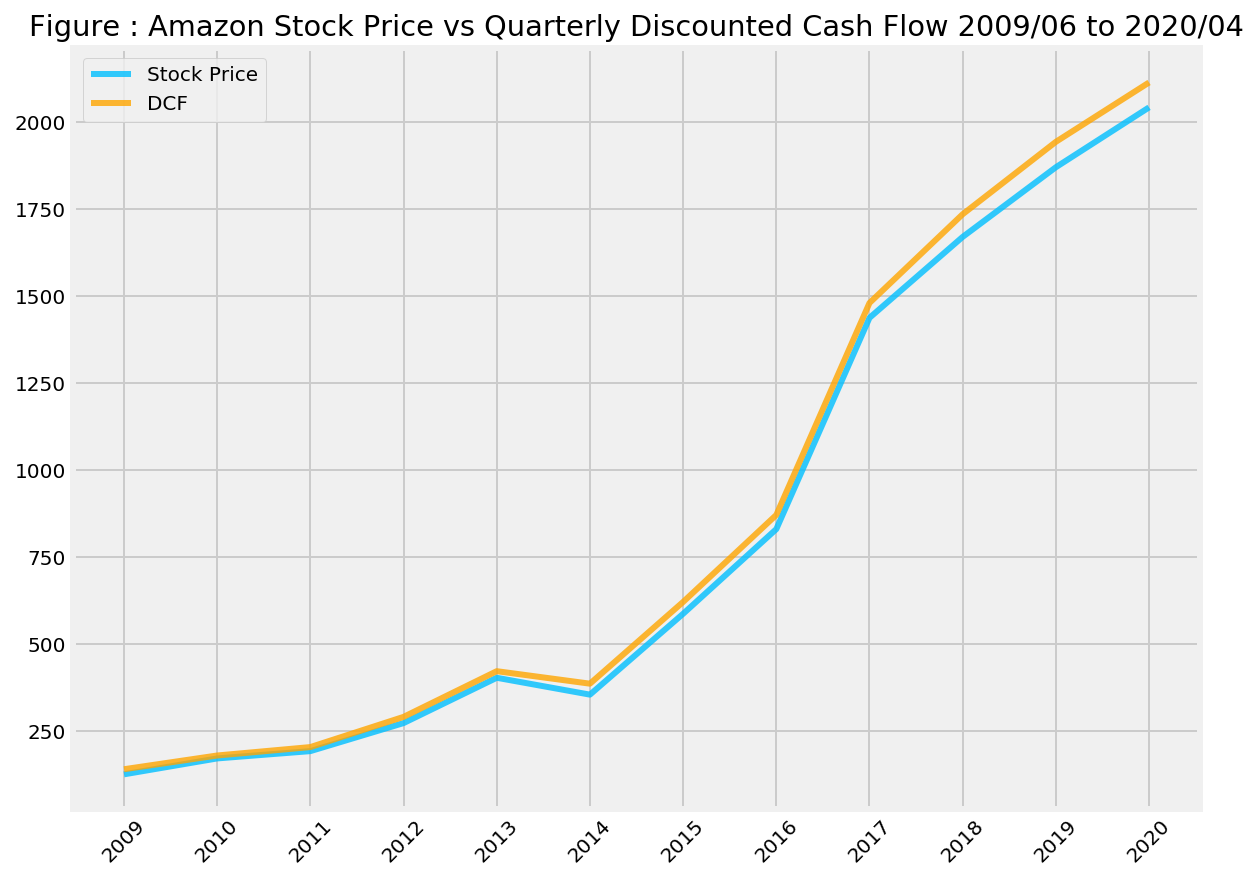

In [84]:
fig = plt.figure(figsize = (14,7))
plt.figure(figsize=(9, 7))
plt.plot(new_dcf_quarterly['stock price'], color='deepskyblue', lw=3, alpha=0.8,label='Stock Price')
plt.plot(new_dcf_quarterly['DCF'], color='orange',lw=3, alpha=0.8, label='DCF')
plt.xticks(rotation=45)
plt.title('Figure : Amazon Stock Price vs Quarterly Discounted Cash Flow 2009/06 to 2020/04')
plt.legend()
plt.show()